In [63]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import csv
import warnings
warnings.filterwarnings('ignore')

In [8]:
soc=pd.read_csv(r"D:\Asus\Videos\compresive_strength_concrete+2.csv")

In [9]:
soc.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


### Renaming columns of the dataset

In [10]:
soc.columns


Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [14]:
soc.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':'Cement(kg/m^3)','Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'BFSlag(kg/m^3)',
'Fly Ash (component 3)(kg in a m^3 mixture)':'Fly_Ash(kg/m^3)', 'Water  (component 4)(kg in a m^3 mixture)':'Water(kg/m^3)',
   'Superplasticizer (component 5)(kg in a m^3 mixture)':'Superplasticizer(kg/m^3)','Coarse Aggregate  (component 6)(kg in a m^3 mixture)': 'CoarseAgg(kg/m^3)',
    'Fine Aggregate (component 7)(kg in a m^3 mixture)':'FineAgg(kg/m^3)', 'Age (day)':'Age', 'Concrete compressive strength(MPa, megapascals) ': 'Comp_Strength(MPa)'     }, inplace=True)

In [15]:
soc

,Cement(kg/m^3),BFSlag(kg/m^3),Fly_Ash(kg/m^3),Water(kg/m^3),Superplasticizer(kg/m^3),CoarseAgg(kg/m^3),FineAgg(kg/m^3),Age,Comp_Strength(MPa)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


### We are to predict the last variable, i.e. CompStrength; so taking that as our dependent variable and rest others as independent variables

In [17]:
soc.describe().T


,count,mean,std,min,25%,50%,75%,max
Cement(kg/m^3),1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
BFSlag(kg/m^3),1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Fly_Ash(kg/m^3),1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water(kg/m^3),1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer(kg/m^3),1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
CoarseAgg(kg/m^3),1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
FineAgg(kg/m^3),1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
Comp_Strength(MPa),1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [18]:
soc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Cement(kg/m^3)            1030 non-null   float64
 1   BFSlag(kg/m^3)            1030 non-null   float64
 2   Fly_Ash(kg/m^3)           1030 non-null   float64
 3   Water(kg/m^3)             1030 non-null   float64
 4   Superplasticizer(kg/m^3)  1030 non-null   float64
 5   CoarseAgg(kg/m^3)         1030 non-null   float64
 6   FineAgg(kg/m^3)           1030 non-null   float64
 7   Age                       1030 non-null   int64  
 8   Comp_Strength(MPa)        1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 80.5 KB


### All required variables are either int64 type or flaot64 type

In [19]:
soc.sum()

Cement(kg/m^3)               289602.9
BFSlag(kg/m^3)                76112.7
Fly_Ash(kg/m^3)               55814.0
Water(kg/m^3)                187014.3
Superplasticizer(kg/m^3)       6390.8
CoarseAgg(kg/m^3)           1002106.5
FineAgg(kg/m^3)              796787.9
Age                           47032.0
Comp_Strength(MPa)            36892.5
dtype: float64

### So all the columns are non-null and have int/digit values

In [30]:
for i in soc.columns:
    is_zero=(soc['Cement(kg/m^3)']==0).sum()
    print(is_zero)

0
0
0
0
0
0
0
0
0


### None of the columns contrain zero values so it appears that alsmost all variabes have coreect valuies

#### Finding outliers

In [40]:
pctl25=soc['Cement(kg/m^3)'].quantile(.25)
pctl75=soc['Cement(kg/m^3)'].quantile(.75)
inter_quartile_range=pctl75-pctl25
outliers=[]
left=pctl25-1.5*inter_quartile_range
right=pctl75+1.5*inter_quartile_range
left_outlier=soc[soc['Cement(kg/m^3)']<left]['Cement(kg/m^3)']
right_outlier=soc[soc['Cement(kg/m^3)']>right]['Cement(kg/m^3)']

outliers.append([left_outlier,right_outlier])

In [43]:
outliers

[[Series([], Name: Cement(kg/m^3), dtype: float64),
  Series([], Name: Cement(kg/m^3), dtype: float64)]]

#### NO OUTLIERS; atleast for Cement(kg/m^3)

In [44]:
scipy.stats.iqr(soc['Cement(kg/m^3)'])

157.625

In [45]:
inter_quartile_range

157.625

In [46]:
left

-44.0625

In [47]:
right

586.4375

### Repeating same excercise for Water

In [134]:
pctl25=soc['Water(kg/m^3)'].quantile(.25)
pctl75=soc['Water(kg/m^3)'].quantile(.75)
inter_quartile_range=pctl75-pctl25
outliers=[]
left=pctl25-1.5*inter_quartile_range
right=pctl75+1.5*inter_quartile_range
left_outlier=soc[soc['Water(kg/m^3)']<left]['Water(kg/m^3)']
right_outlier=soc[soc['Water(kg/m^3)']>right]['Water(kg/m^3)']

outliers.append([left_outlier,right_outlier])

# Now changing the values of these outliers to median value as most of the density plots are skewed.
soc[soc['Water(kg/m^3)']<left]=soc['Water(kg/m^3)'].median()
soc[soc['Water(kg/m^3)']>right]=soc['Water(kg/m^3)'].median()


print((soc['Water(kg/m^3)']<left).sum())
print((soc['Water(kg/m^3)']>right).sum())



0
0


In [132]:
soc['Water(kg/m^3)'].median()

185.0

In [125]:
right

232.64999999999998

In [90]:
left #the left most value that isn't an outlier

124.25000000000001

In [91]:
right #the right most value that isn't an outlier

232.64999999999998

In [79]:
inter_quartile_range

27.099999999999994

In [84]:
left_outlier

224    121.8
225    121.8
226    121.8
227    121.8
228    121.8
Name: Water(kg/m^3), dtype: float64

In [85]:
right_outlier

862     237.0
873     247.0
936     246.9
1019    236.7
Name: Water(kg/m^3), dtype: float64

In [88]:
(soc['Water(kg/m^3)']>right).sum()  # no. of outliers to the right side

4

In [89]:
(soc['Water(kg/m^3)']<left).sum()  # no. of outliers to the left side

5

## Time to see Uni-Variate Plots

<AxesSubplot:>

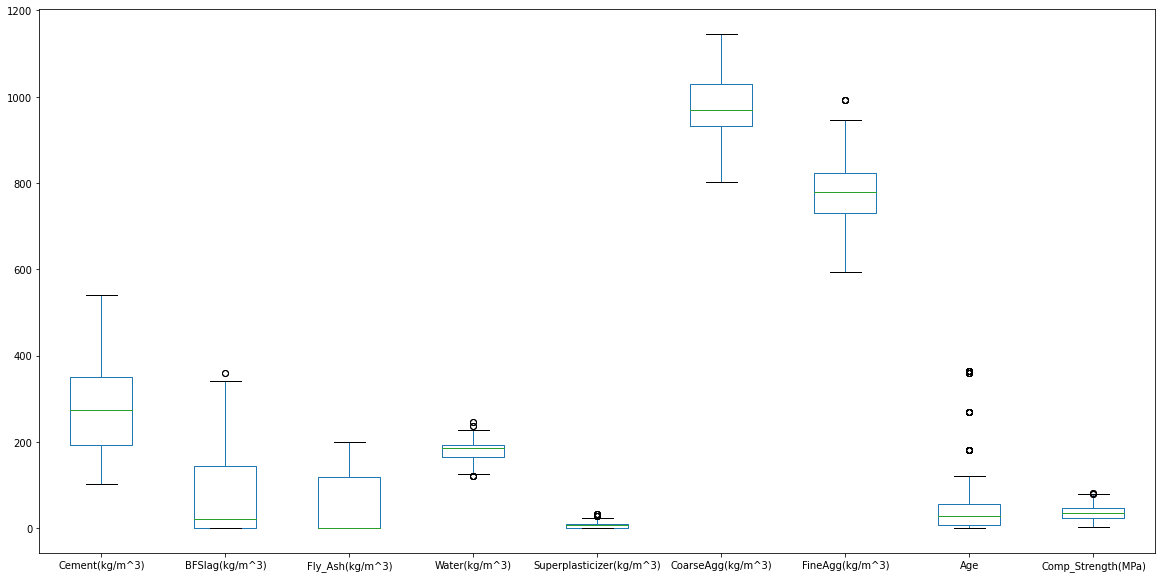

In [113]:

soc.boxplot(figsize=[20,10], grid=False)

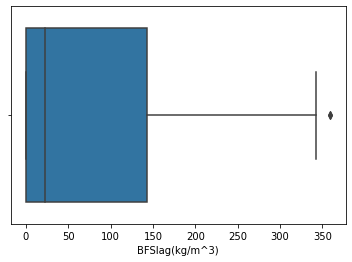

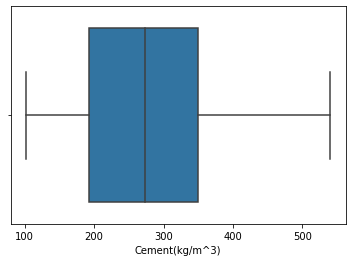

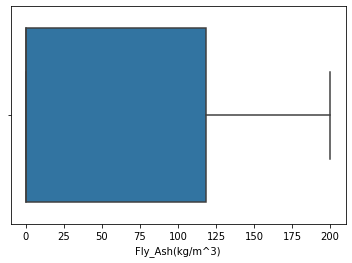

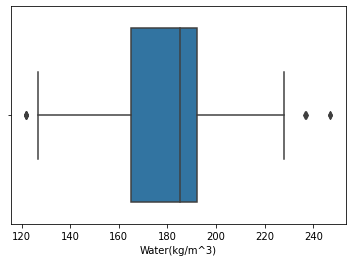

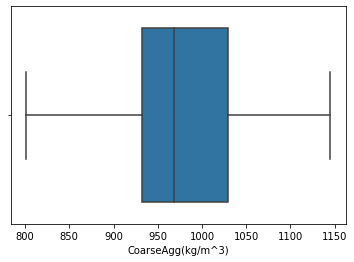

In [70]:
sns.boxplot(soc['BFSlag(kg/m^3)']);
plt.show()
sns.boxplot(soc['Cement(kg/m^3)']);
plt.show()
sns.boxplot(soc['Fly_Ash(kg/m^3)']);
plt.show()
sns.boxplot(soc['Water(kg/m^3)']);
plt.show()
sns.boxplot(soc['CoarseAgg(kg/m^3)']);
plt.show()


In [100]:
soc.columns

Index(['Cement(kg/m^3)', 'BFSlag(kg/m^3)', 'Fly_Ash(kg/m^3)', 'Water(kg/m^3)',
       'Superplasticizer(kg/m^3)', 'CoarseAgg(kg/m^3)', 'FineAgg(kg/m^3)',
       'Age', 'Comp_Strength(MPa)'],
      dtype='object')

## Plotting some Distribution PLots using Seaborn and Subplots from Matplotlib

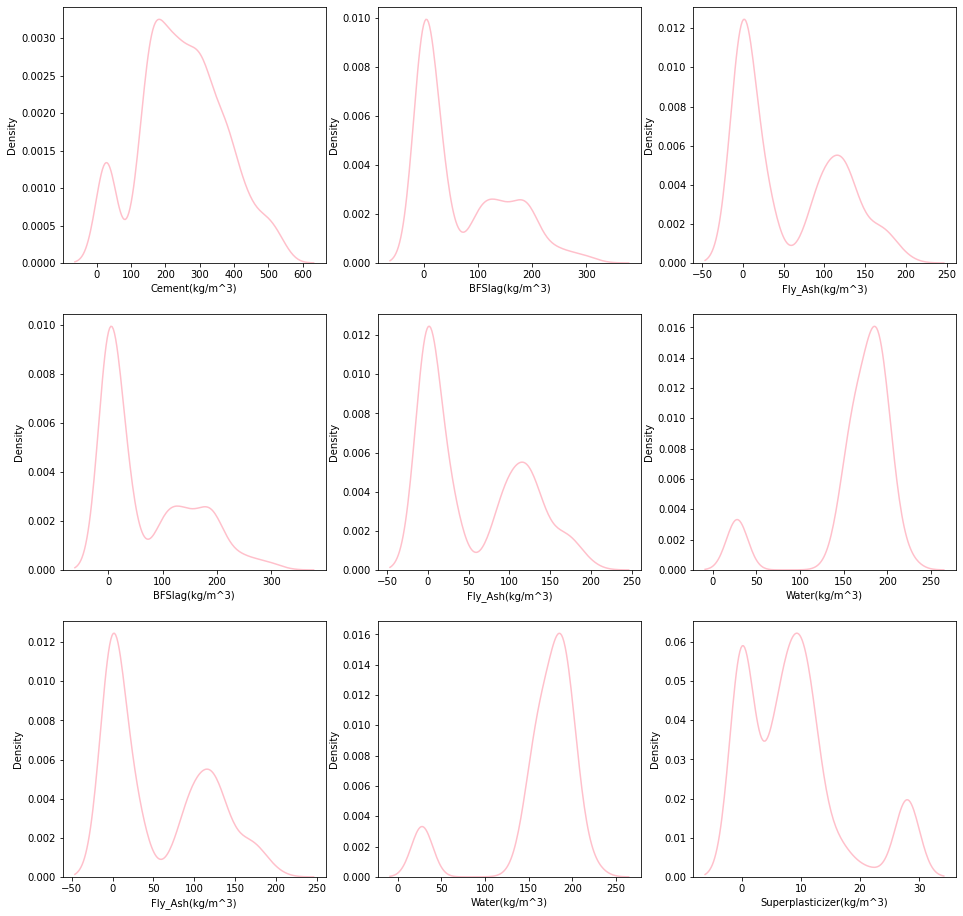

In [227]:
fig, ax= plt.subplots(nrows=3,ncols=3, figsize=[16,16])
"""
sns.distplot(soc['BFSlag(kg/m^3)'], hist=False, ax=ax[0][0] , color='pink')

sns.distplot(soc['Cement(kg/m^3)'], hist=False, ax=ax[0][1])

sns.distplot(soc['Fly_Ash(kg/m^3)'], hist=False, ax=ax[0][2],color='pink')

sns.distplot(soc['Water(kg/m^3)'], hist=False, ax=ax[1][0])

sns.distplot(soc['CoarseAgg(kg/m^3)'], hist=False, ax=ax[1][1],color='pink')

sns.distplot(soc['Superplasticizer(kg/m^3)'], hist=False, ax=ax[1][2] )

sns.distplot(soc['FineAgg(kg/m^3)'], hist=False, ax=ax[2][0],color='pink')

sns.distplot(soc['Age'], hist=False, ax=ax[2][1])

sns.distplot(soc['Comp_Strength(MPa)'], hist=False, ax=ax[2][2],color='pink')
"""
cols=soc.columns
cols=str(cols)
for i in range(0,3):
    for j in range(0,3):
        sns.distplot(soc.iloc[:,(i+j)], hist=False, ax=ax[i][j] , color='pink')
    

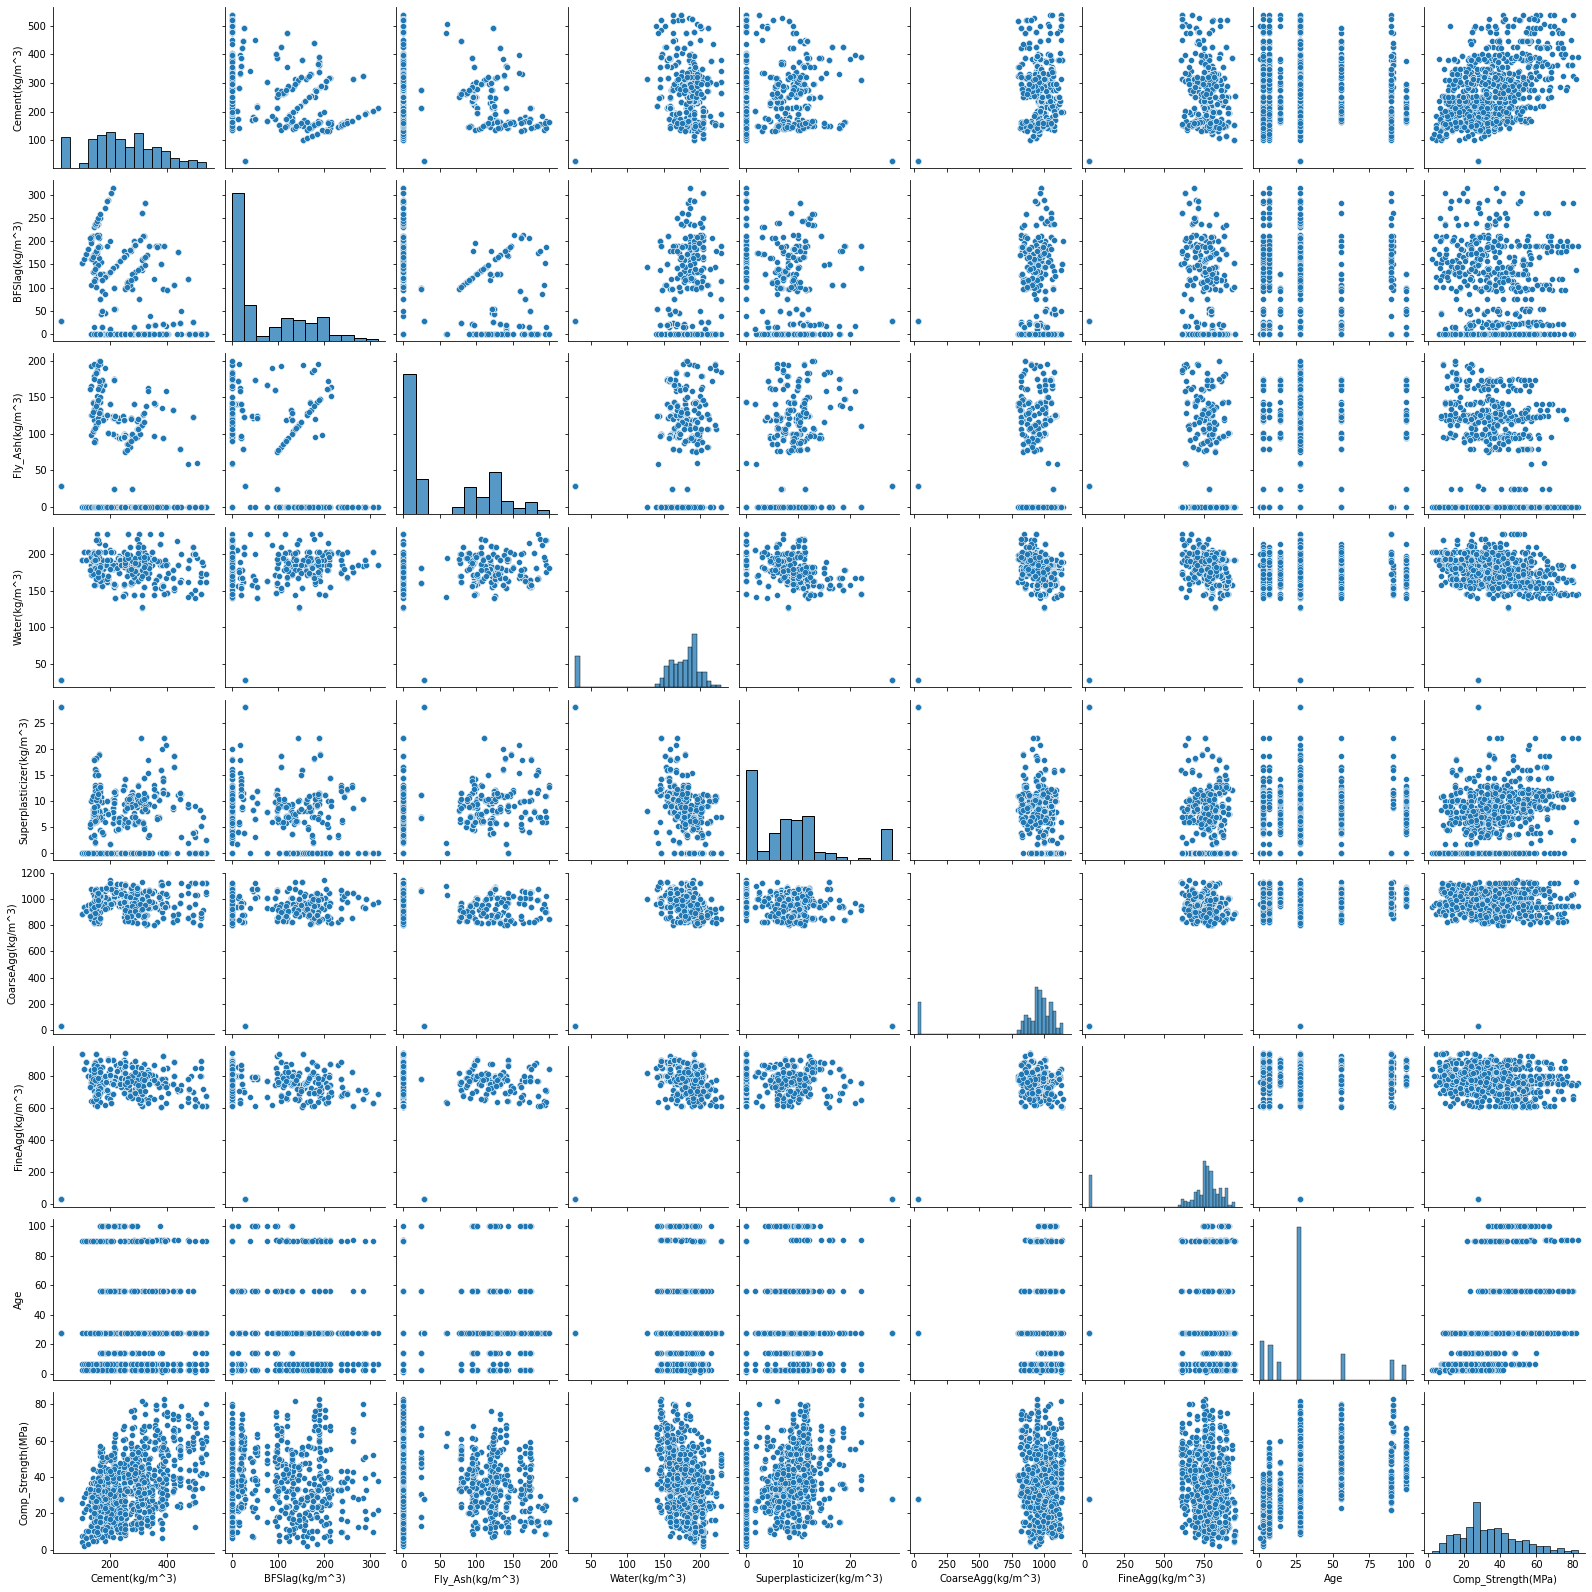

In [229]:
sns.pairplot(soc, kind='scatter')

## Correlation b/w variables

<AxesSubplot:>

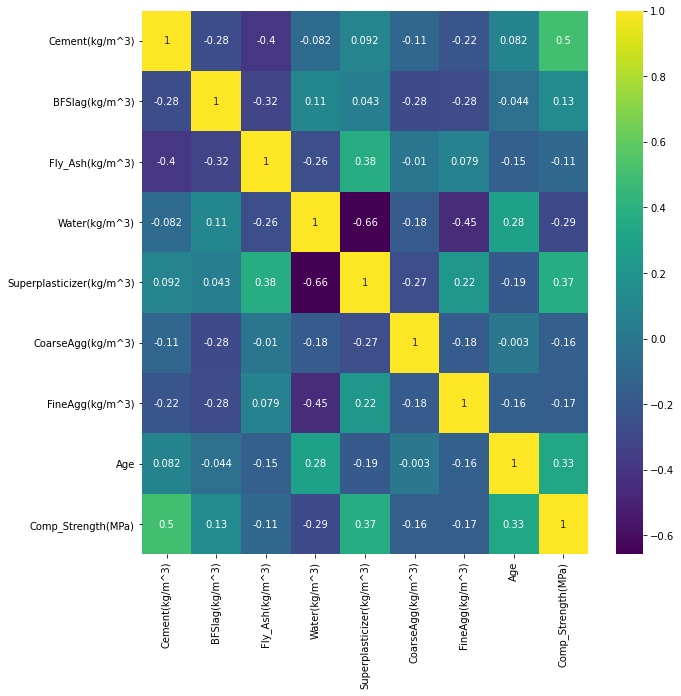

In [110]:
plt.figure(figsize=[10,10])
sns.heatmap(soc.corr(), annot=True, cmap='viridis')

### We can't see multi-collinearity so no need for PCA

##### Removing outliers for entire dataset

In [203]:
for i in soc.columns[:-1]:
    i=str(i)
    pctl25=soc[i].quantile(.25)
    pctl75=soc[i].quantile(.75)
    inter_quartile_range=pctl75-pctl25
    
    left=pctl25-1.5*inter_quartile_range
    right=pctl75+1.5*inter_quartile_range
    left_outlier=soc[soc[i]<left][i]
    right_outlier=soc[soc[i]>right][i]

    
    # Now changing the values of these outliers to median value as most of the density plots are skewed.
    soc[soc[i]<left]=soc[i].median()
    soc[soc[i]>right]=soc[i].median()


    print((soc[i]<left).sum())
    print((soc[i]>right).sum())






0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


<AxesSubplot:>

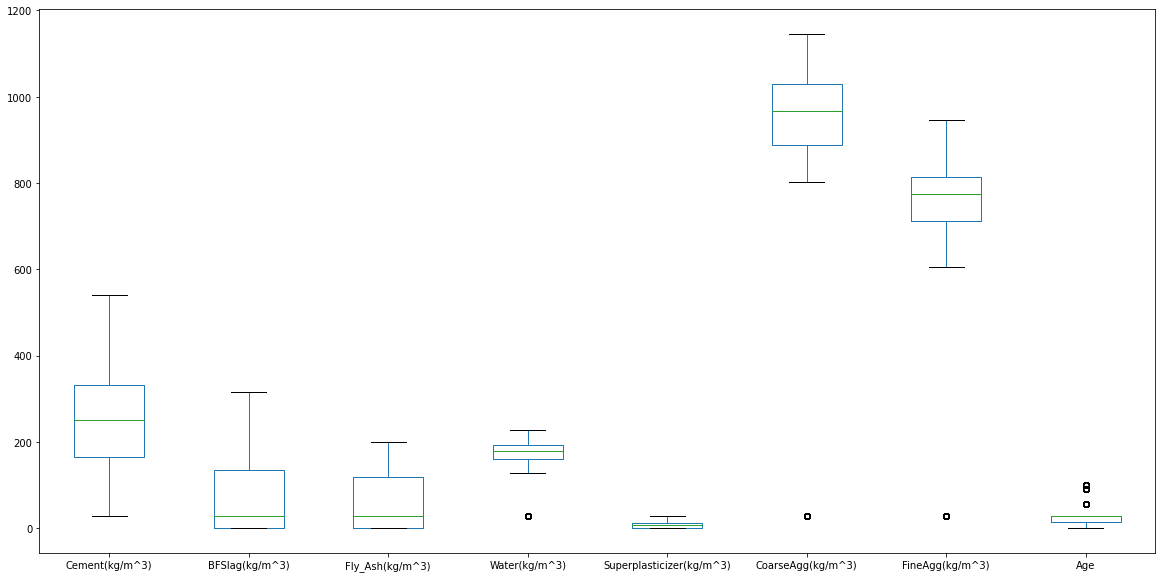

In [207]:
soc.iloc[:,:-1].boxplot(figsize=[20,10], grid=False)

### Now Compare it with the last boxplot we plotted

In [210]:
x=soc[cols[:-1]]
y=soc.iloc[:,-1]

In [211]:
y

0       79.99
1       61.89
2       28.00
3       28.00
4       28.00
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: Comp_Strength(MPa), Length: 1030, dtype: float64

In [212]:
from sklearn.model_selection import train_test_split as tts

In [220]:
xtrain,xtest,ytrain,ytest=tts(x,y, test_size=0.3)

In [221]:
xtrain.count()

Cement(kg/m^3)              721
BFSlag(kg/m^3)              721
Fly_Ash(kg/m^3)             721
Water(kg/m^3)               721
Superplasticizer(kg/m^3)    721
CoarseAgg(kg/m^3)           721
FineAgg(kg/m^3)             721
dtype: int64

In [222]:
xtest.count()

Cement(kg/m^3)              309
BFSlag(kg/m^3)              309
Fly_Ash(kg/m^3)             309
Water(kg/m^3)               309
Superplasticizer(kg/m^3)    309
CoarseAgg(kg/m^3)           309
FineAgg(kg/m^3)             309
dtype: int64

In [223]:
ytest

485    50.24
524    59.49
818    55.94
536    39.60
276    29.65
       ...  
479    38.02
573    38.70
272    42.70
247    39.59
98     55.60
Name: Comp_Strength(MPa), Length: 309, dtype: float64

In [224]:
ytrain

217    38.56
990    36.35
270    26.77
431    20.73
523    62.94
       ...  
115    35.10
920    29.07
317    44.14
874    36.80
184    11.58
Name: Comp_Strength(MPa), Length: 721, dtype: float64